# VALIDACIÓN DE SUPUESTOS 

1. LINEALIDAD
2. HOMOSCEDASTICIDAD
3. NORMALIDAD
4. INDEPENDENCIA DE LOS ERRORES

In [26]:
from scipy import stats
import numpy as np
import pandas as pd
import statsmodels.api as sm # Utilizado para construir y analizar modelos estadísticos, como la regresión lineal.
import matplotlib.pyplot as plt # Herramienta para generar gráficos.
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats


In [28]:
# Lectura y copia de dataset
ruta_archivo = r"C:\Users\user\Desktop\Datos.xlsx"
data = pd.read_excel(ruta_archivo)

# Ver las primeras filas
print(data.head())


   Empresa  Inversión en marketing digital        Venta
0        1                         2008148  50225258.80
1        2                         2041273  45103182.50
2        3                         2057234  45143085.00
3        4                         2067740  45169350.00
4        5                         2145127  58773569.43


In [27]:
# Preparación de Datos
X = data['Inversión en marketing digital']
y = data['Venta']

Aquí se extraen dos variables de un conjunto de datos (data). X representa la variable independiente (gasto en marketing digital), y y es la variable dependiente (ventas).

In [29]:
# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

Añadir una constante significa incluir un término de intercepto en el modelo de regresión lineal, lo que asegura que se ajuste una línea con una intersección distinta de cero.

In [31]:
# Fit the regression model
model = sm.OLS(y, X).fit()


Se crea un modelo de regresión lineal ordinaria (OLS, por sus siglas en inglés) usando y como variable dependiente y X (que incluye la constante) como variable independiente.
El método .fit() ajusta el modelo a los datos.

In [33]:
# Residuals and predicted values
residuals = model.resid
predicted = model.fittedvalues

residuals: Los residuos son la diferencia entre los valores observados (y) y los valores predichos por el modelo.
predicted: L predichos poos valoresr el modelo.

## Gráficos para evaluar los supuestos del modelo

#### Gráfico de los residuos vs. los valores ajustados (Linealidad y homocedasticidad)

Text(0, 0.5, 'Residuals')

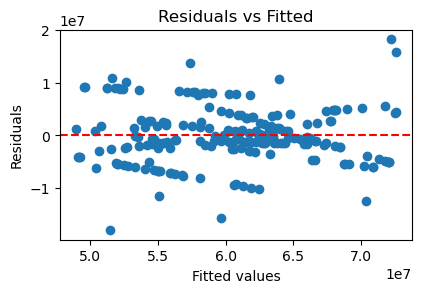

In [34]:
# Gráfico de los residuos vs. los valores ajustados (Linealidad y homocedasticidad)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')


Verifica si los residuos se distribuyen aleatoriamente alrededor de cero (verificación de la homocedasticidad y la linealidad). Si el gráfico muestra un patrón claro, puede ser indicativo de problemas en los supuestos de la regresión. En nuestro caso El gráfico de residuos vs. valores ajustados no muestra un patrón claro, lo que sugiere que la relación entre inversión en marketing y ventas es aproximadamente lineal.La dispersión de los residuos es bastante constante a lo largo del rango de valores ajustados, lo que indica homoscedasticidad (varianza constante).

## Normalidad:

Text(0.5, 1.0, 'Q-Q Plot')

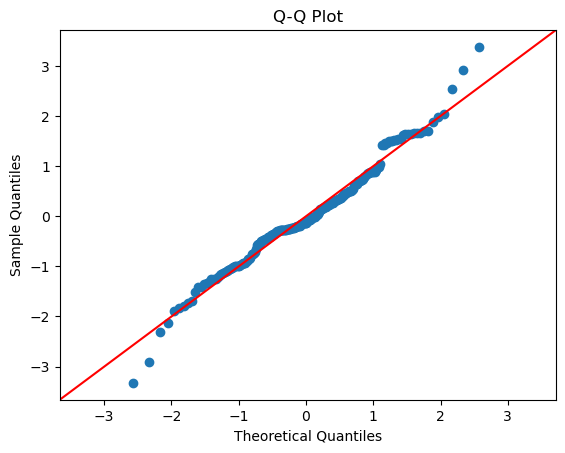

In [36]:
#  Gráfico Q-Q para verificar la normalidad de los residuos

sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot')

El gráfico Q-Q compara la distribución de los residuos con una distribución normal. Si los puntos se alinean sobre la línea diagonal, los residuos siguen una distribución normal. Los residuos siguen bien la línea de 45 grados, lo que sugiere que están aproximadamente distribuidos de forma normal.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Residuals')

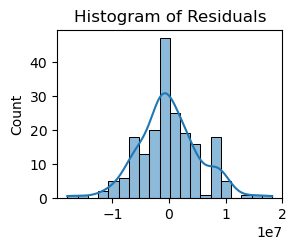

In [37]:
# Residuals histogram for normality check
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

Este histograma muestra la distribución de los residuos para ayudar a visualizar si son aproximadamente normales.